In [1]:
import os
import sys

import pytesseract as T
# tesseract_dcmd = f"{os.environ['LOCALAPPDATA']}/Tesseract-OCR/tesseract.exe"
# T.pytesseract.tesseract_cmd = tesseract_dcmd

from PIL import Image
import pandas

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn import datasets

%matplotlib inline

# Load Images

Image shape:  (1639, 1741)


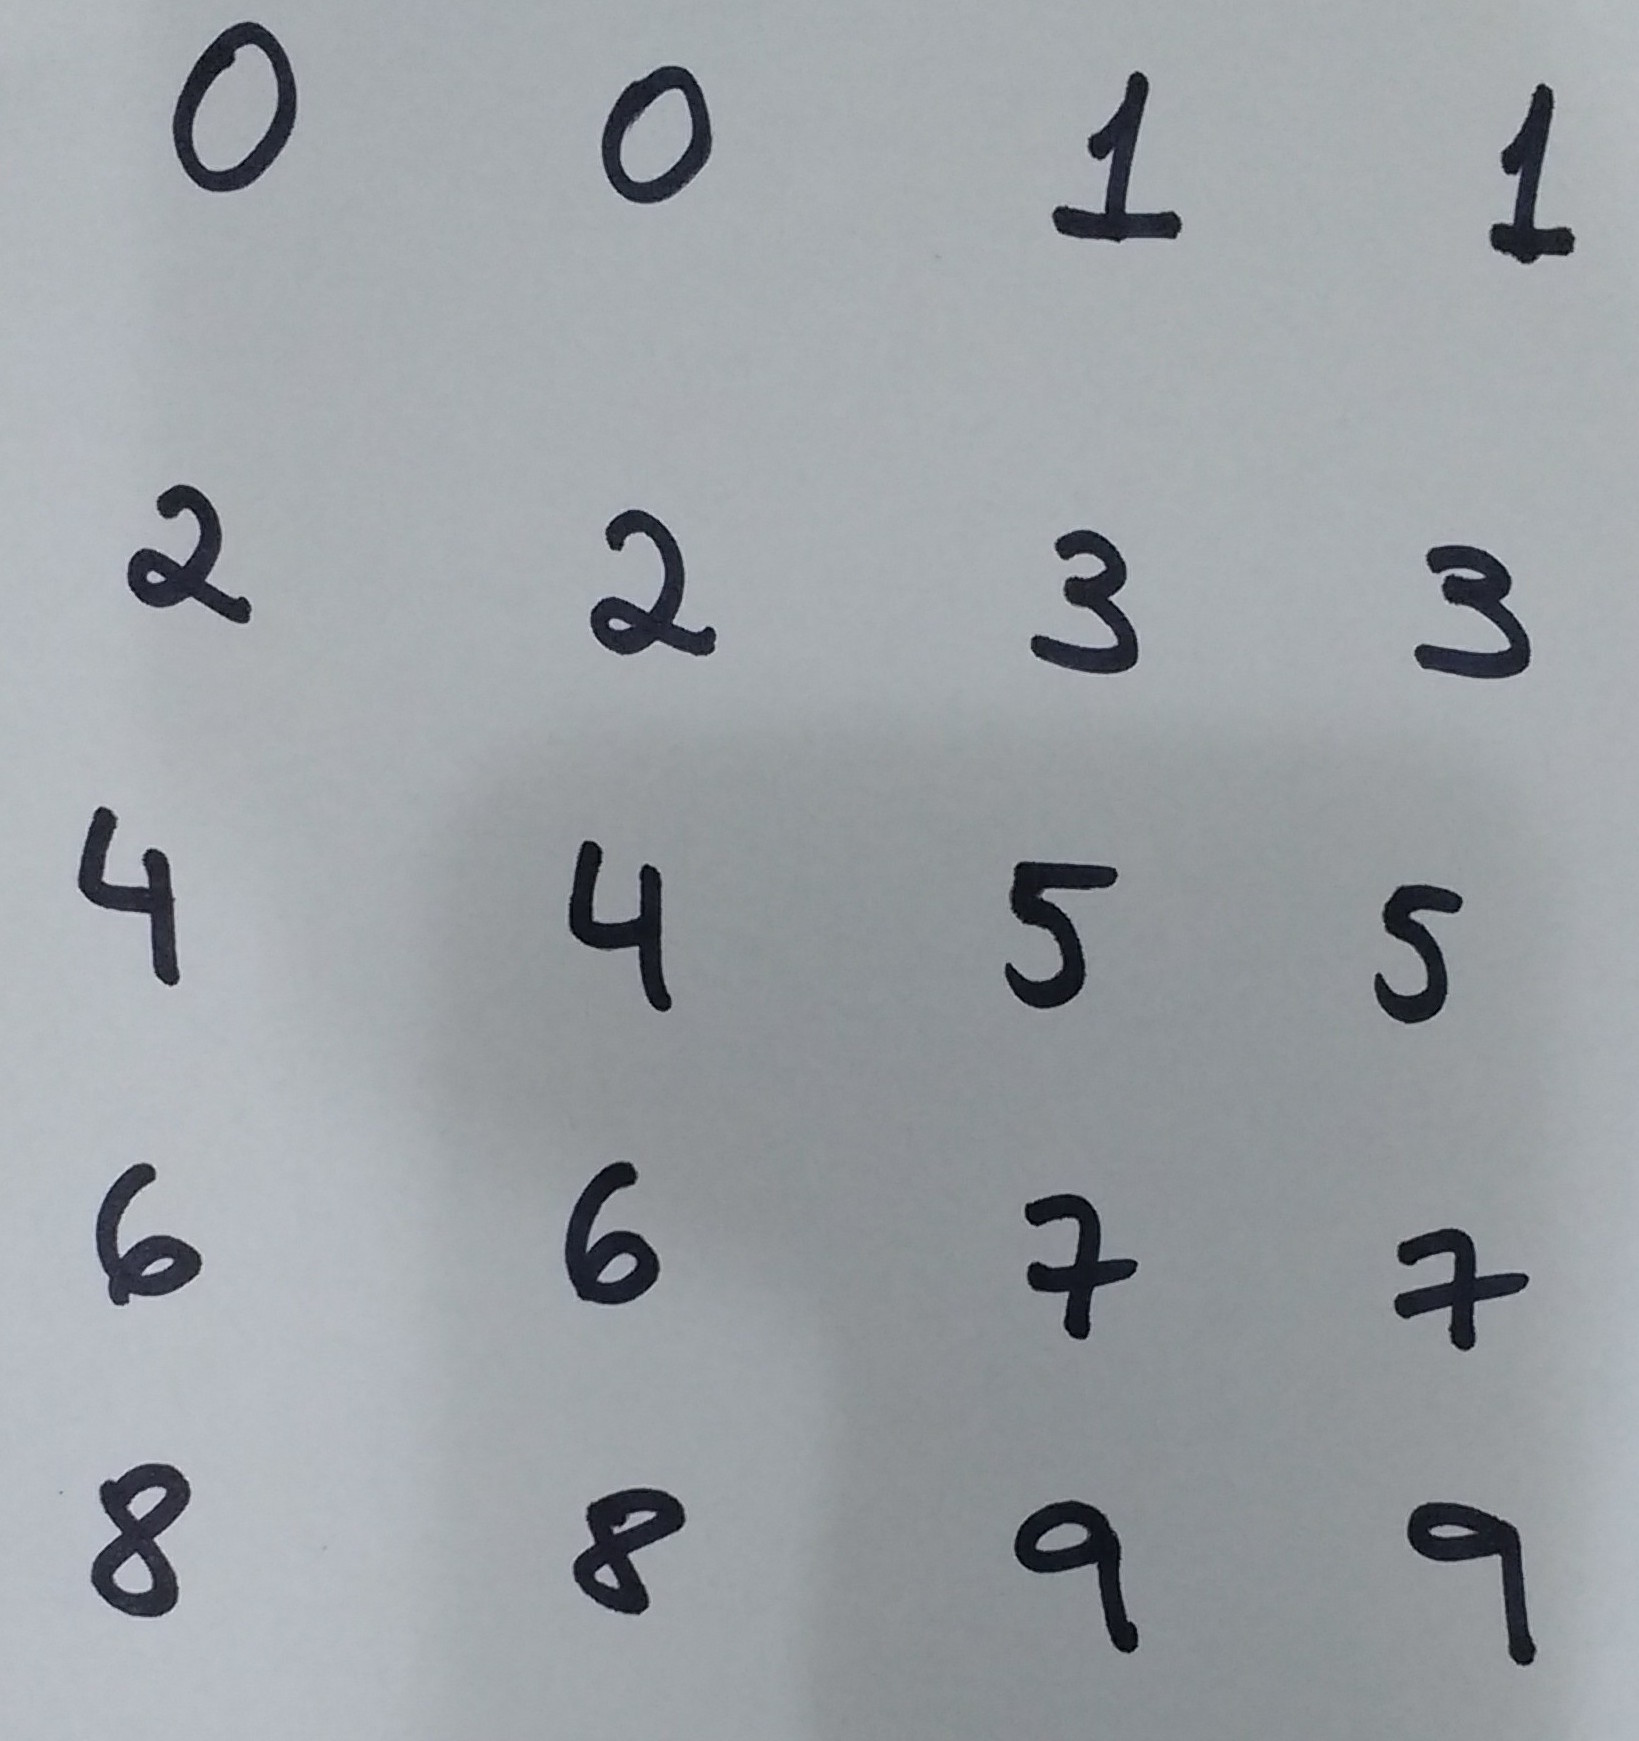

In [2]:
fname = '../Data/numbers.jpg'
img = Image.open(fname)
print('Image shape: ', img.size)
img

# Preprocessed Image

Reshaped From:  (1639, 1741)
           to:  (188, 200)
ARRAY LIkE [[182 183 183 ... 183 182 182]
 [184 184 182 ... 181 182 182]
 [184 184 182 ... 182 182 182]
 ...
 [186 188 187 ... 179 181 181]
 [186 186 187 ... 178 182 182]
 [186 186 186 ... 180 182 182]]


([], [])

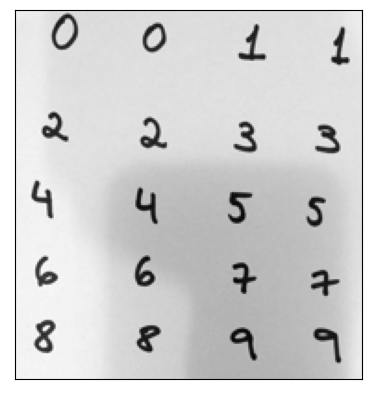

In [3]:
th = 500
ny = 200

if ny is None:
    ny = img.size[1]
nx = int(img.size[0] / float(img.size[1]) * ny)

print('Reshaped From: ', img.size)
print('           to: ', (nx,ny))

prep_img = img.resize((nx,ny)).copy()
prep_img = np.asarray(prep_img.convert('L')).copy()
prep_img[prep_img > th] = 0

print('ARRAY LIkE', prep_img)

plt.imshow(prep_img, cmap='gray')
plt.xticks([])
plt.yticks([])

# Tesseract

In [6]:
x

[['level',
  'page_num',
  'block_num',
  'par_num',
  'line_num',
  'word_num',
  'left',
  'top',
  'width',
  'height',
  'conf',
  'text'],
 ['1', '1', '0', '0', '0', '0', '0', '0', '188', '200', '-1', ''],
 ['']]

In [8]:
charlist='0123456789'

tess_conf = {
    'textord_words_default_nonspace': '10',
    'tessedit_char_whitelist': charlist,
    'min_sane_x_ht_pixels': '1',
    'edges_min_nonhole': '100'
}
tess_conf_str = ' '.join(['-c '+k+'='+v for k,v in tess_conf.items()])
tess_conf_str = tess_conf_str + ' --oem 0'
print(tess_conf_str)


no_rows = 5
min_blocks = 2
no_blocks = 20
x = [row.split('\t') for row in T.image_to_data(prep_img, config=tess_conf_str).split('\n')]
print(x)
print('TESTE DE BLOCOS')
print('\tNumber of rows from tesseract (%i) > %i'%(len(x)+1, min_blocks))
if not (len(x)+1 > min_blocks):
    raise Exception("found only one block in one row! (%i)"%len(x))

df = pandas.DataFrame(data=x[1:], columns=x[0])

print('TESTE DE LINHAS')
print('\tNumber of lines (%i) == %i'%(df.line_num.astype(int).max(), no_rows))
print('\t=>', df.line_num.astype(int).max() == no_rows)

print('TESTE DE TOTAL')
print('\tTotal number of characters == %i'%no_blocks)




# Draw boxes
plt.imshow(prep_img, cmap='gray')
for i, row in df.iterrows():
    #if float(row.conf) <= 0: continue
    r = patches.Rectangle((row.left, row.top), row.width, row.height, color='r', fill=False, lw=2)
    plt.gca().add_artist(r)
plt.xticks([])
plt.yticks([])

print(df.text[df.text != ''].values)



-c textord_words_default_nonspace=10 -c tessedit_char_whitelist=0123456789 -c min_sane_x_ht_pixels=1 -c edges_min_nonhole=100 --oem 0
[['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'], ['1', '1', '0', '0', '0', '0', '0', '0', '188', '200', '-1', ''], ['']]
TESTE DE BLOCOS
	Number of rows from tesseract (4) > 2
TESTE DE LINHAS


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [ ]:
df.line_num.astype(int).max()

In [ ]:
df

In [12]:
# find correct number of rows and characters, adjusting tesseract conf
min_sane_x_ht_pixels = 1


charlist='0123456789'
charlist = charlist + charlist.upper()
tess_conf = '-c tessedit_char_whitelist='+charlist
#tess_conf = tess_conf + ' -c min_sane_x_ht_pixels=%i'%min_sane_x_ht_pixels
print(tess_conf)



min_split = 4
x = [row.split('\t') for row in T.image_to_data(bw_img, config=tess_conf).split('\n')]
print('Testing: len(x) >= %i'%min_split)
print(len(x))
print(len(x)>=min_split)
print(x)

-c tessedit_char_whitelist=01234567890123456789
Testing: len(x) >= 4
11
True
[['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'], ['1', '1', '0', '0', '0', '0', '0', '0', '1639', '1741', '-1', ''], ['2', '1', '1', '0', '0', '0', '602', '66', '110', '137', '-1', ''], ['3', '1', '1', '1', '0', '0', '602', '66', '110', '137', '-1', ''], ['4', '1', '1', '1', '1', '0', '602', '66', '110', '137', '-1', ''], ['5', '1', '1', '1', '1', '1', '602', '66', '110', '137', '85.010910', '0'], ['2', '1', '2', '0', '0', '0', '173', '22', '123', '170', '-1', ''], ['3', '1', '2', '1', '0', '0', '173', '22', '123', '170', '-1', ''], ['4', '1', '2', '1', '1', '0', '173', '22', '123', '170', '-1', ''], ['5', '1', '2', '1', '1', '1', '173', '22', '123', '170', '77.835495', '0'], ['']]


In [ ]:
img.size

In [11]:
charlist='0123456789'
charlist = charlist + charlist.upper()

tess_conf = '-c tessedit_char_whitelist='+charlist

tess_conf = tess_conf + 'min_sane_x_ht_pixels=8'


x = [row.split('\t') for row in T.image_to_data(bw_img, config=tess_conf).split('\n')]
df = pandas.DataFrame(data=x[1:], columns=x[0])

plt.imshow(bw_img, cmap='gray')
for i, row in df.iterrows():
    if float(row.conf) <= 0: continue
    r = patches.Rectangle((row.left, row.top), row.width, row.height, color='r', fill=False, lw=2)
    plt.gca().add_artist(r)
plt.xticks([])
plt.yticks([])

print(df.text[df.text != ''].values)

TypeError: float() argument must be a string or a number, not 'NoneType'

Error in callback <function _draw_all_if_interactive at 0x000001FBAEEAD310> (for post_execute):


ConversionError: Failed to convert value(s) to axis units: '602'

ConversionError: Failed to convert value(s) to axis units: '602'

<Figure size 640x480 with 1 Axes>

In [10]:
th = 220
bw_img = np.asarray(img.convert('L')).copy()

bw_img[bw_img > th] = 0

charlist='0123456789abcdefghijklmnopqrstuvxwyz'
charlist = charlist + charlist.upper()

#tess_conf = '-c tessedit_char_whitelist='+charlist

x = [row.split('\t') for row in T.image_to_data(bw_img, config=tess_conf).split('\n')]
df = pandas.DataFrame(data=x[1:], columns=x[0])

plt.imshow(bw_img, cmap='gray')
for i, row in df.iterrows():
    if float(row.conf) <= 0: continue
    r = patches.Rectangle((row.left, row.top), row.width, row.height, color='r', fill=False, lw=10)
    plt.gca().add_artist(r)
plt.xticks([])
plt.yticks([])

print(df.text[df.text != ''].values)

TypeError: float() argument must be a string or a number, not 'NoneType'

Error in callback <function _draw_all_if_interactive at 0x000001FBAEEAD310> (for post_execute):


ConversionError: Failed to convert value(s) to axis units: '602'

ConversionError: Failed to convert value(s) to axis units: '602'

<Figure size 640x480 with 1 Axes>